In [1]:
options(warn=-1)
options("getSymbols.warning4.0"=FALSE)

## 7 Quantmod

Quantmod stands for quantitative financial modelling framework. It has three main functions:

1. download data
2. charting, and
3. technical indicator

Then we can conduct simple test on trading strategies. We will learn how to test more complicated strategies.

Before we start, let us use the following code install and load __quantmod__.

In [2]:
suppressMessages(library(quantmod))

Learning Objectives:
* Use __quantmod__ package to download stock prices
* create chart of stock prices and add technical indicators
* construct simple trading indicator and apply it into trading
* evaluate theperformance of a trading rule based on return data

### 7.1 Downloading data

Use __getSymbols__ to get data from yahoo or Google (default is yahoo)

In [3]:
getSymbols('SCHA')

[1] "SCHA"

Let see what is inside

In [4]:
head(SCHA)

           SCHA.Open SCHA.High SCHA.Low SCHA.Close SCHA.Volume SCHA.Adjusted
2009-11-03     24.05     24.77    21.70      24.59       54900      21.18954
2009-11-04     24.85     24.95    24.33      24.38      116800      21.00858
2009-11-05     24.67     25.05    24.57      25.02       35700      21.56008
2009-11-06     24.80     25.23    24.73      25.05       87100      21.58593
2009-11-09     25.65     25.65    25.30      25.62       95200      22.07711
2009-11-10     25.62     25.72    25.28      25.48      146200      21.95646

To extract columns, we use Op, Hi, Lo, CI, Vo and Ad

In [5]:
Open <- Op(SCHA)
High <- Hi(SCHA)
Low <- Lo(SCHA)
Close <- Cl(SCHA)
Volume <- Vo(SCHA)
AdjClose <- Ad(SCHA)

If you wish to only import at a certain date e.g., 2020-01-01 to 2020-03-30, we can restrict the set the data to download

In [6]:
getSymbols('SCHA', from='2020-01-01', to='2020-03-30')

[1] "SCHA"

Alternatively, we can load the whole series and restrict using xts function __last()__

In [7]:
getSymbols("SCHA")
SCHA <- last(SCHA, '1 year')
head(SCHA)

[1] "SCHA"

           SCHA.Open SCHA.High SCHA.Low SCHA.Close SCHA.Volume SCHA.Adjusted
2020-01-02     76.10     76.10    75.07      75.74      452900      75.38448
2020-01-03     74.86     75.56    74.75      75.41      406100      75.05604
2020-01-06     74.87     75.56    74.72      75.48      377000      75.12571
2020-01-07     75.35     75.53    75.06      75.30      342600      74.94656
2020-01-08     75.30     75.76    75.08      75.46      346600      75.10580
2020-01-09     75.81     75.90    75.44      75.61      378700      75.25510

Alternatively, we can take the first 3 years by using __first()__

In [8]:
getSymbols("SCHA")
SCHA <- first(SCHA, '3 years')
head(SCHA)

[1] "SCHA"

           SCHA.Open SCHA.High SCHA.Low SCHA.Close SCHA.Volume SCHA.Adjusted
2009-11-03     24.05     24.77    21.70      24.59       54900      21.18954
2009-11-04     24.85     24.95    24.33      24.38      116800      21.00858
2009-11-05     24.67     25.05    24.57      25.02       35700      21.56008
2009-11-06     24.80     25.23    24.73      25.05       87100      21.58593
2009-11-09     25.65     25.65    25.30      25.62       95200      22.07711
2009-11-10     25.62     25.72    25.28      25.48      146200      21.95646

We can also import three stocks at the same time by using a vector.

In [9]:
getSymbols(c("SCHA","SCHV"))

[1] "SCHA" "SCHV"

Alternatively, we can assign a vector of stocks and import based on the vector

In [10]:
stocklist <- c("SCHA","SCHV")
getSymbols(stocklist)

[1] "SCHA" "SCHV"

The package can also import non-US stocks.

In [11]:
getSymbols("0941.HK")
head(`0941.HK`)

[1] "0941.HK"

           0941.HK.Open 0941.HK.High 0941.HK.Low 0941.HK.Close 0941.HK.Volume
2007-01-02        67.25        70.00       67.10          69.6       35293388
2007-01-03        69.90        71.80       69.50          70.7       41163203
2007-01-04        70.60        70.95       67.30          68.2       37286533
2007-01-05        67.50        69.50       66.30          69.5       24502496
2007-01-08        67.50        68.40       67.45          67.7       15584163
2007-01-09        68.00        68.60       65.55          66.3       17861491
           0941.HK.Adjusted
2007-01-02         44.25044
2007-01-03         44.94978
2007-01-04         43.36033
2007-01-05         44.18684
2007-01-08         43.04243
2007-01-09         42.15236

Besides prices, very often we are interested in the trading volume. Moreover, we would like to find volume over time: weekly, monthly, quarterly and yearly. We can use apply and sum to calculate the rolling sum of volume to each distinct period.

In [12]:
WeekVoYa <- apply.weekly(Vo(SCHA), sum)
MonthVoYa <- apply.monthly(Vo(SCHA), sum)
QuarterVoYa <- apply.quarterly(Vo(SCHA), sum)
YearVoYa <- apply.yearly(Vo(SCHA), sum)

In some case, we are interested in average than the sum. Then we can use apply and mean.

In [13]:
WeekAveVoClYa <- apply.weekly(Vo(SCHA), mean)

In [14]:
lst <- ls()
lst <- lst[lst != 'SCHA']
rm(list=lst)
rm(lst)

### 7.2 Charting

Quantmod draw nice charts of following common types:

1. line
2. bars
3. candlesticks

We can use __chartSeries()__ and specify the types directly.

The line chart displays stock price of SCHA in 2020 by using the __subset__ option. The option __theme__ is set to be __chartTheme('white')__ as the default option __chartTheme('black')__ is not printer-friendly.

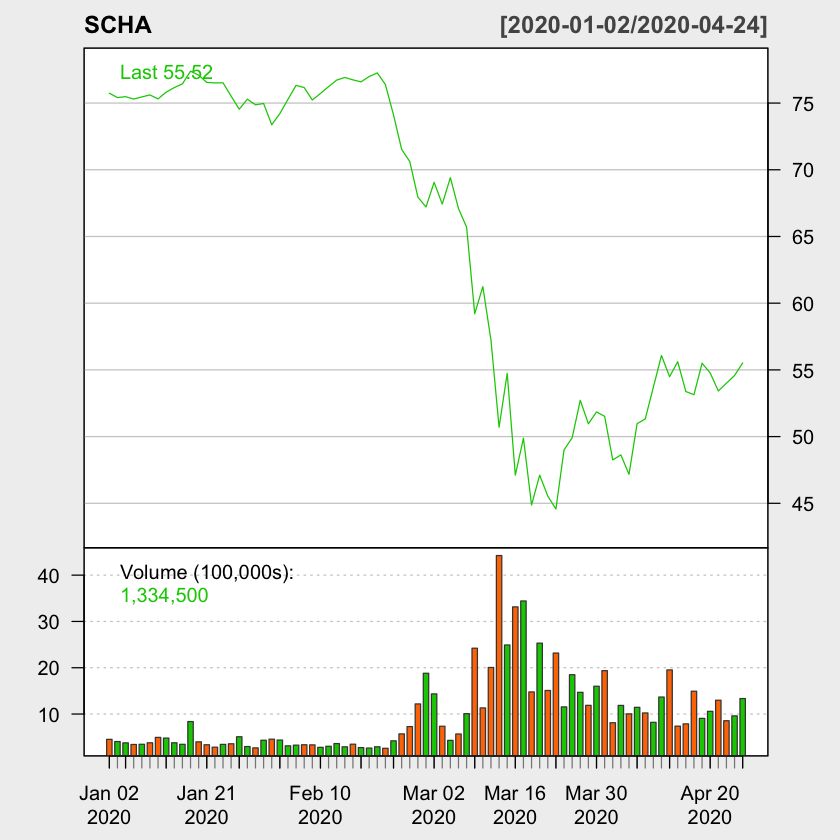

In [15]:
chartSeries(SCHA,
           type="line",
           subset="2020",
           theme=chartTheme('white'))

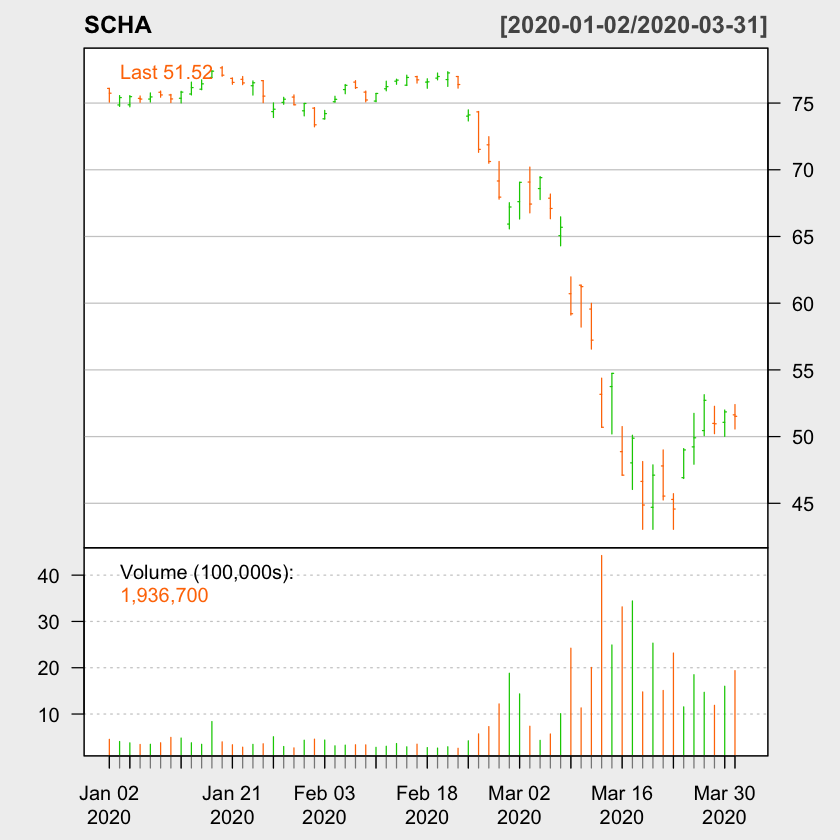

In [16]:
chartSeries(SCHA,
           type="bar",
           subset="2020-01::2020-03",
           theme=chartTheme('white'))

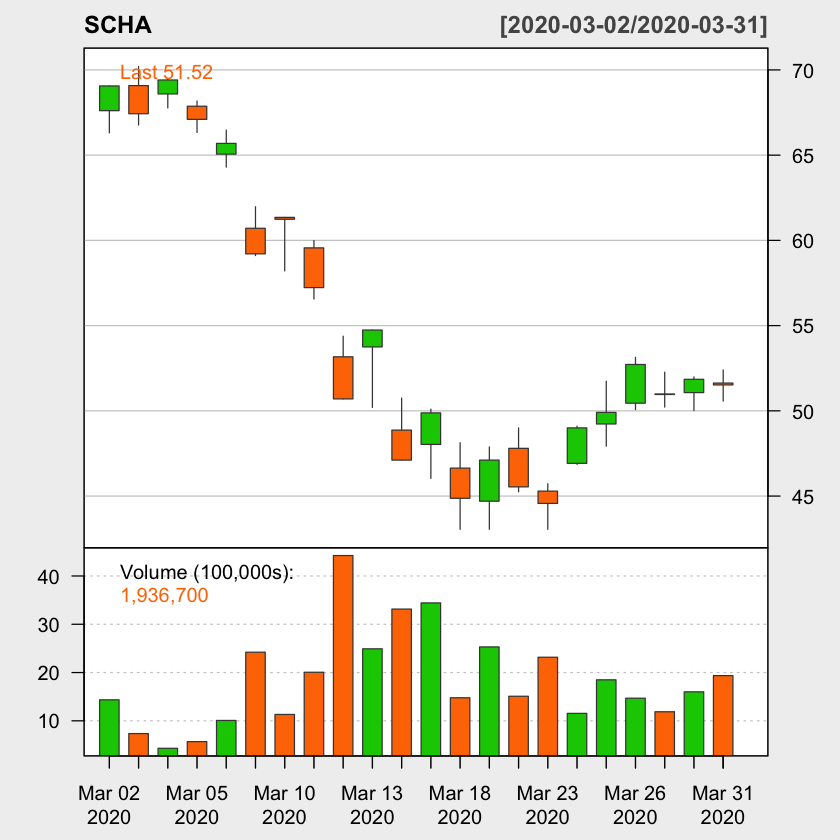

In [17]:
chartSeries(SCHA,
           type="candlesticks",
           subset="2020-03",
           theme=chartTheme('white'))

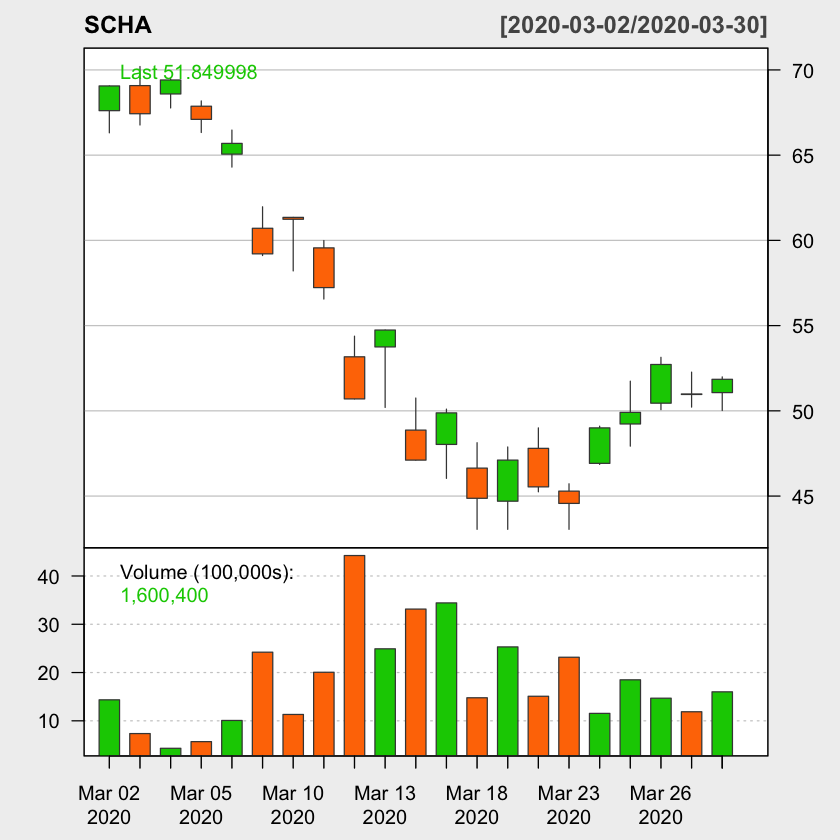

In [18]:
chartSeries(SCHA,
           type="auto",
           subset="2020-03-02::2020-03-30",
           theme=chartTheme('white'))

### 7.3 Technical Indicators

Technical trading rule (__TTR__) package is loaded when we load __quantmod__ package.

If you want to use it separately, then just load the package as usual:

In [19]:
suppressMessages(library(TTR))

#### 7.3.1 Simple Moving Average

In [20]:
sma <- SMA(Cl(SCHA), n=20)
tail(sma, n=5)

               SMA
2020-04-20 51.6770
2020-04-21 52.1195
2020-04-22 52.3695
2020-04-23 52.6030
2020-04-24 52.7430

#### 7.3.2 Exponential moving average

In [21]:
ema <- EMA(Cl(SCHA), n=20)
tail(ema, n=5)

                EMA
2020-04-20 53.57163
2020-04-21 53.55719
2020-04-22 53.59936
2020-04-23 53.69275
2020-04-24 53.86678

#### 7.3.3 Bollinger band

In [22]:
bb <- BBands(Cl(SCHA), s.d=2)
tail(bb, n=5)

                 dn    mavg       up      pctB
2020-04-20 45.66856 51.6770 57.68544 0.7573881
2020-04-21 47.03779 52.1195 57.20121 0.6279587
2020-04-22 47.43647 52.3695 57.30253 0.6652635
2020-04-23 47.71586 52.6030 57.49014 0.7022657
2020-04-24 47.69277 52.7430 57.79323 0.7749382

#### 7.3.4 Momentum

In [23]:
M <- momentum(Cl(SCHA), n=2)
head(M, n=5)

           SCHA.Close
2009-11-03         NA
2009-11-04         NA
2009-11-05   0.430000
2009-11-06   0.670000
2009-11-09   0.600001

#### 7.3.5 ROC

In [24]:
ROC <- ROC(Cl(SCHA), n=2)
head(ROC, n=5)

           SCHA.Close
2009-11-03         NA
2009-11-04         NA
2009-11-05 0.01733565
2009-11-06 0.02711070
2009-11-09 0.02369783

#### 7.3.6 MACD

In [25]:
macd <- MACD(Cl(SCHA), nFast=12, nSlow=26, nSig=9, maType=SMA)
tail(macd, n=5)

               macd     signal
2020-04-20 3.970648 -0.1504829
2020-04-21 4.859866  1.1192962
2020-04-22 5.430004  2.1880254
2020-04-23 5.645033  3.0504804
2020-04-24 5.484939  3.7111296

#### 7.3.7 RSI

In [26]:
rsi <- RSI(Cl(SCHA), n=14)
tail(rsi, n=5)

                rsi
2020-04-20 50.59936
2020-04-21 47.94059
2020-04-22 49.17620
2020-04-23 50.44290
2020-04-24 52.50877

### 7.4 Charting with Indicators

#### 7.4.1 Charting SMA

We use the function __addSMA()__ to put

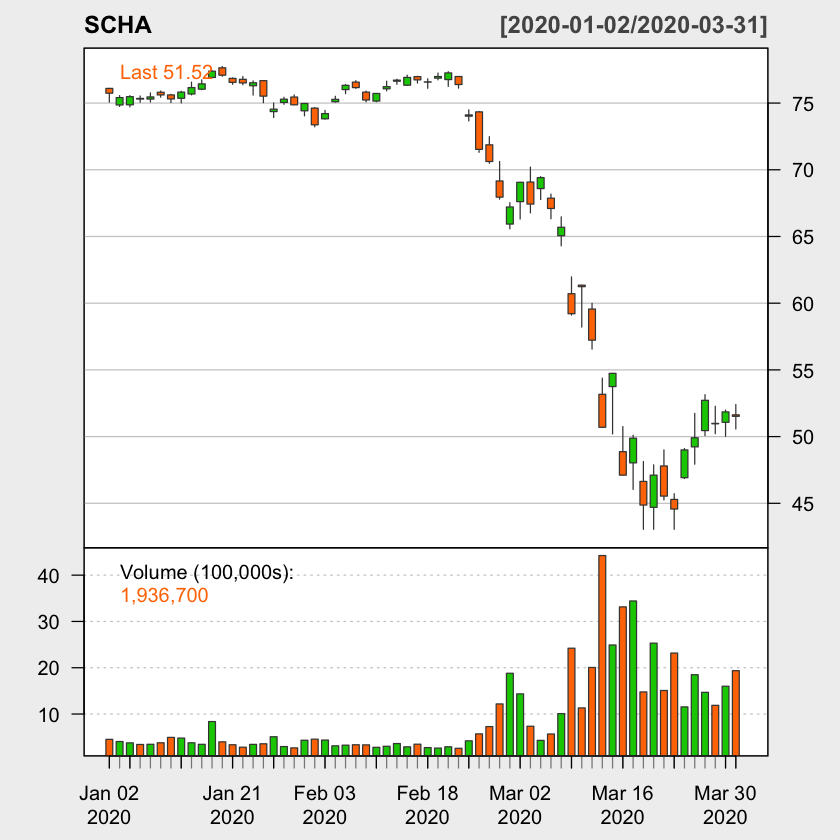

In [27]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
            theme=chartTheme('white'))

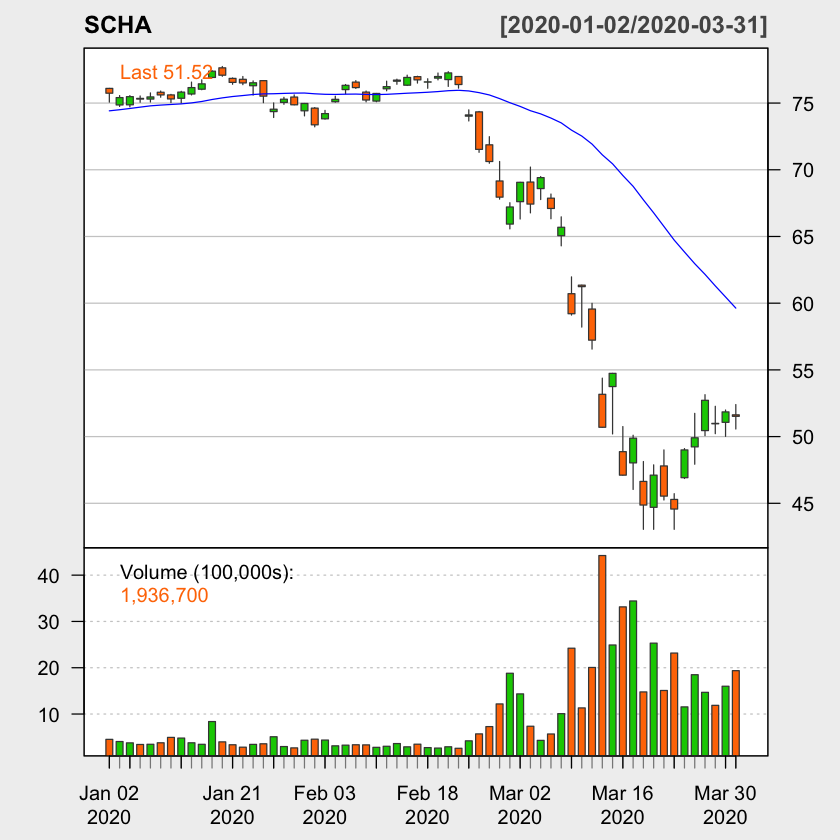

In [28]:
addSMA(n=30, on=1, col="blue")

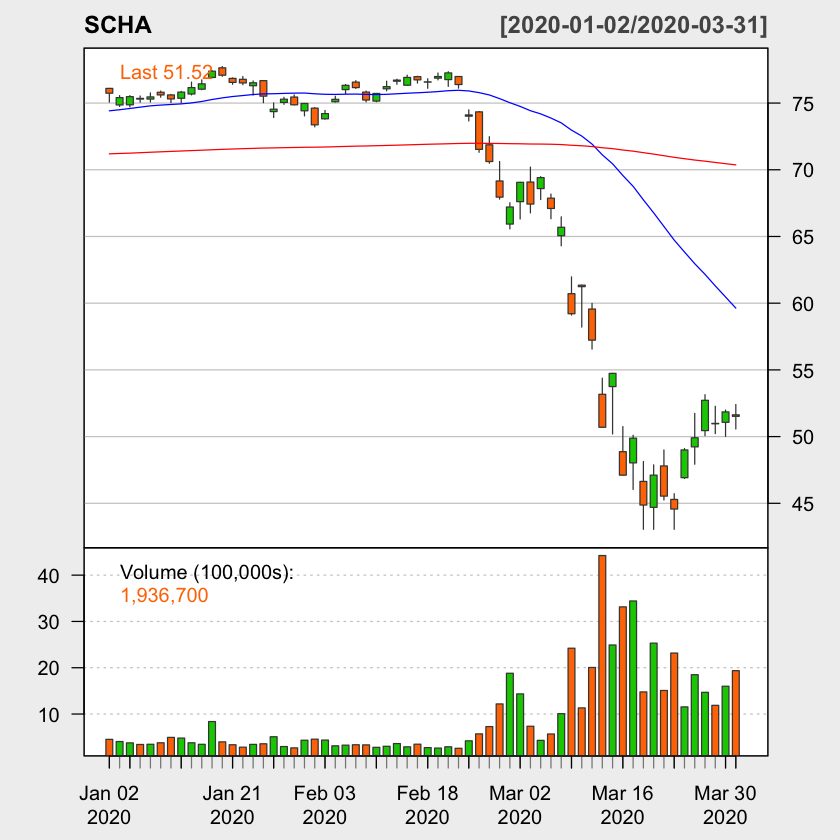

In [29]:
addSMA(n=200, on=1, col="red")

#### 7.4.2 Charting EMA

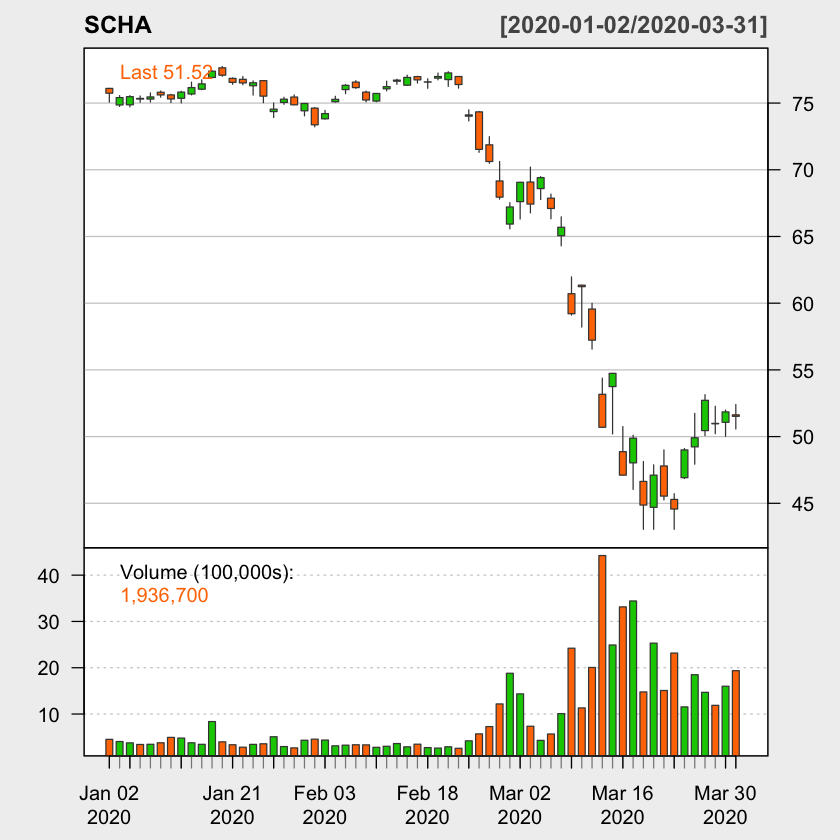

In [30]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

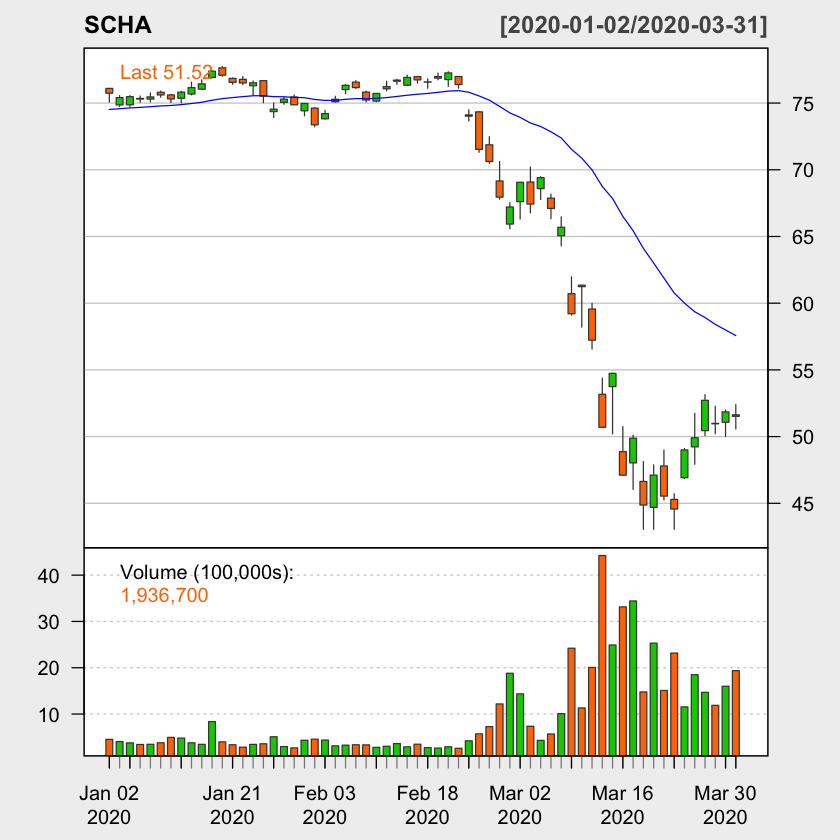

In [31]:
addEMA(n=30, on=1, col="blue")

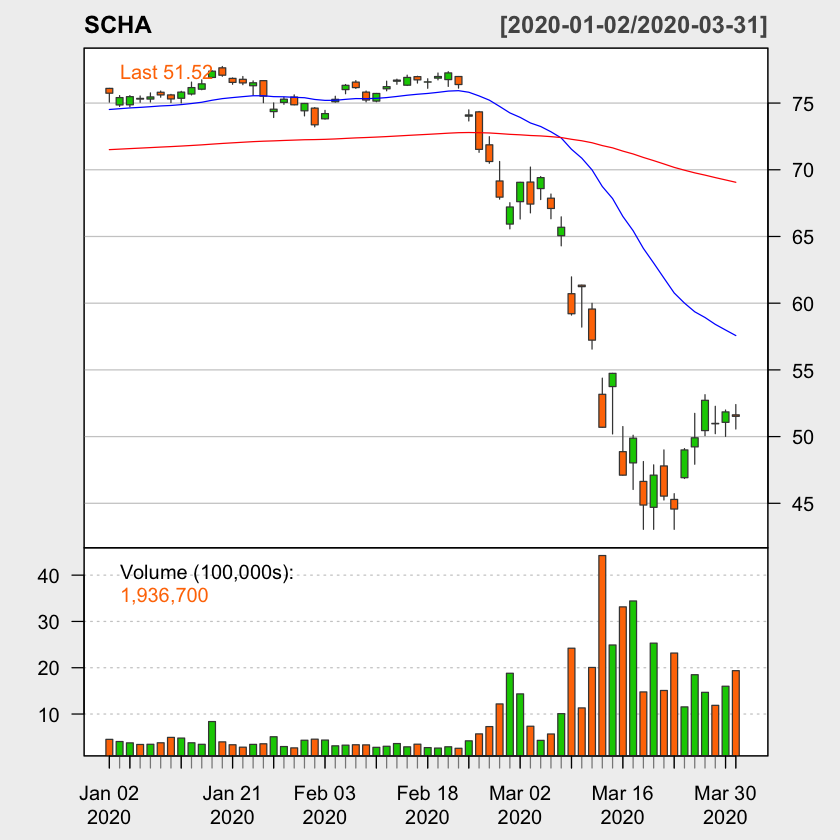

In [32]:
addEMA(n=200, on=1, col="red")

#### 7.4.3 Charting Bollinger band

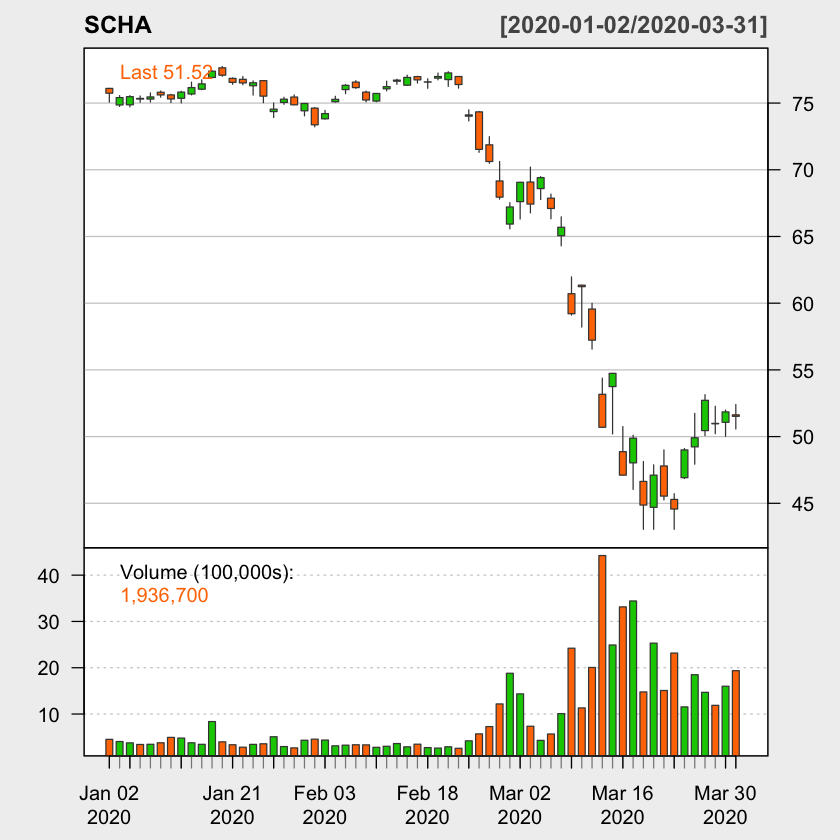

In [33]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

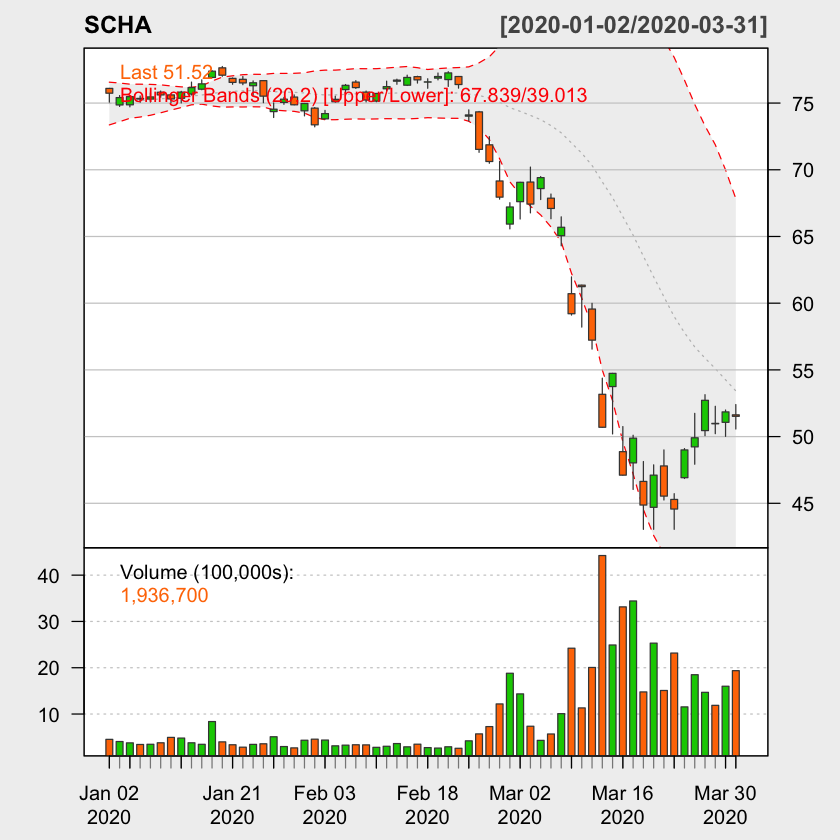

In [34]:
addBBands( n=20, sd=2)

#### 7.4.4 Charting Momentum

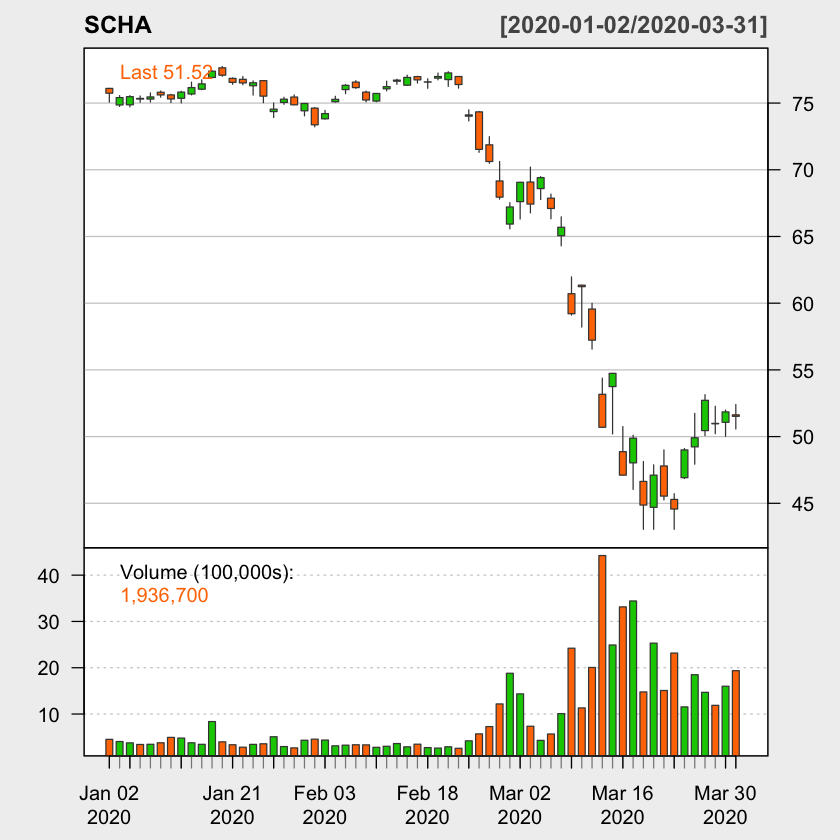

In [35]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

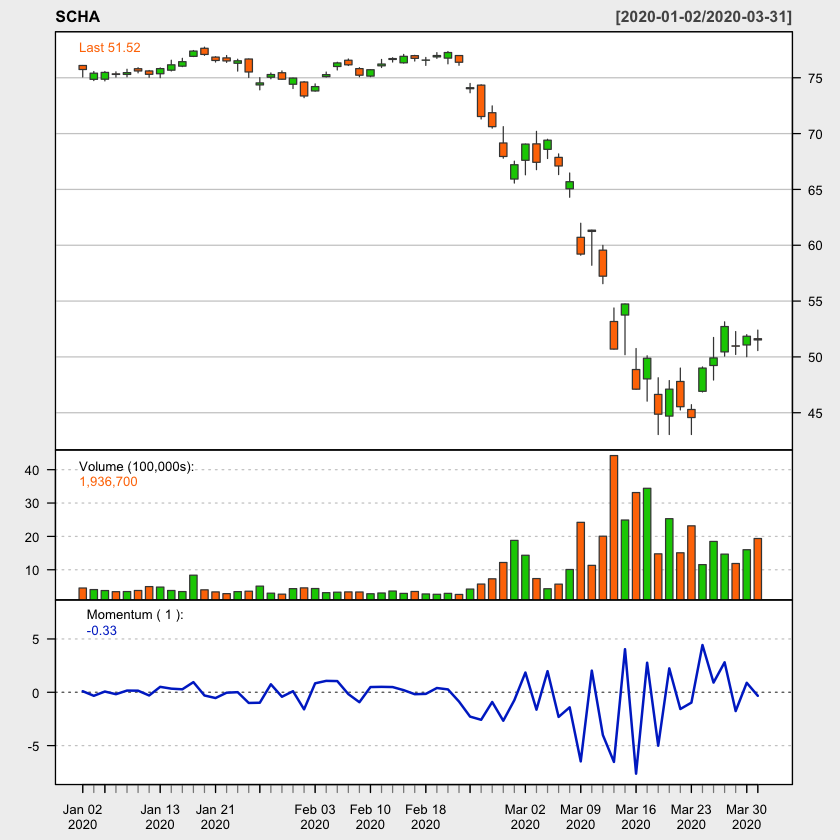

In [36]:
addMomentum(n=1)

#### 7.4.5 Charting ROC

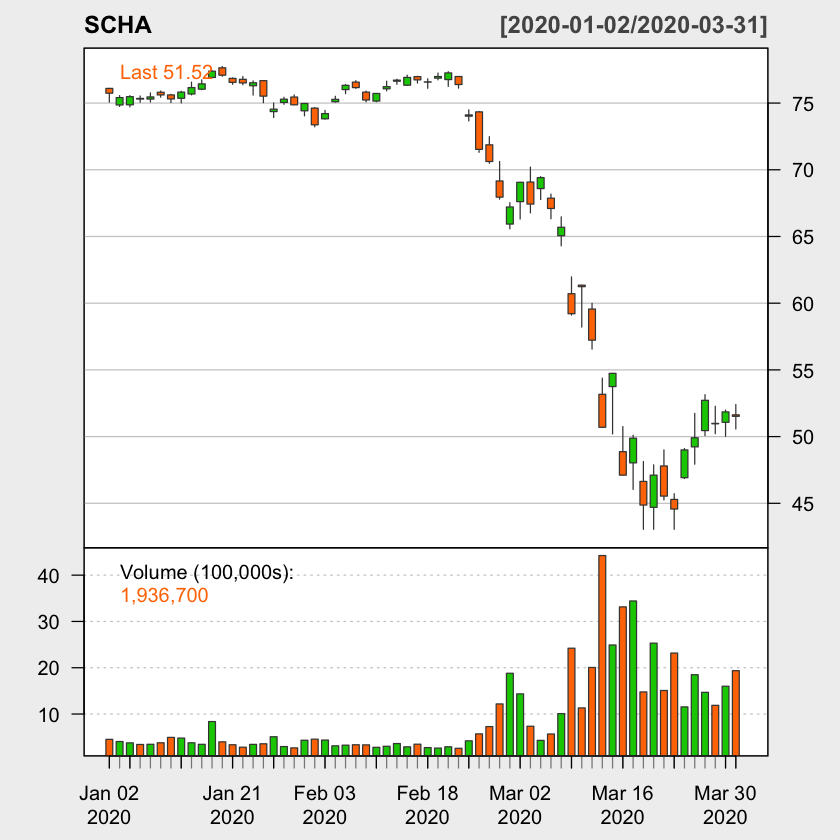

In [37]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

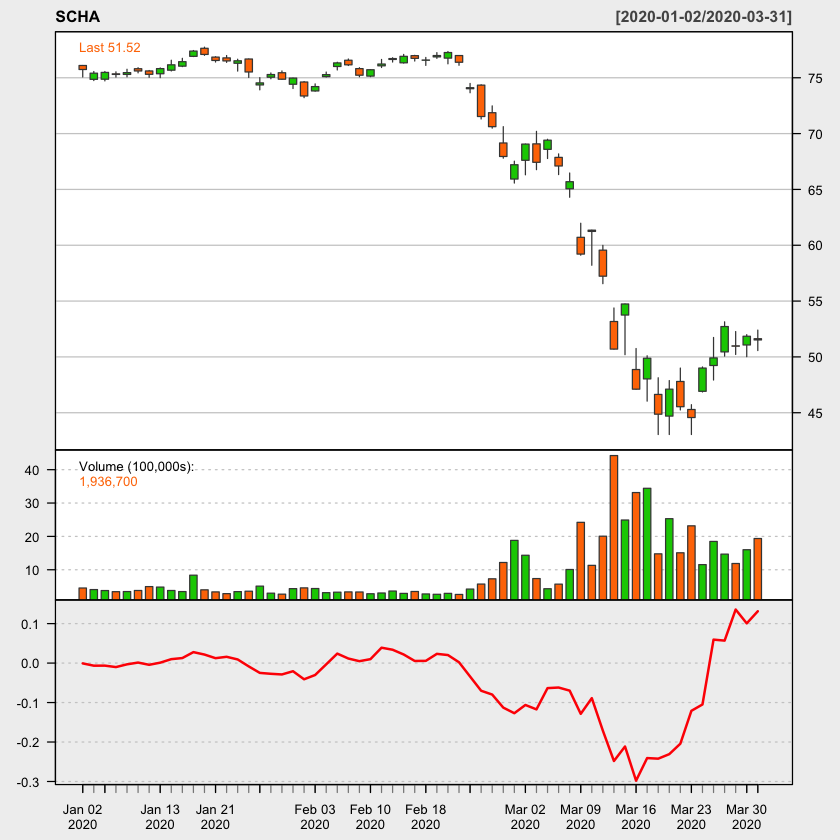

In [38]:
addROC(n=7)

#### 7.4.6 Charting MACD

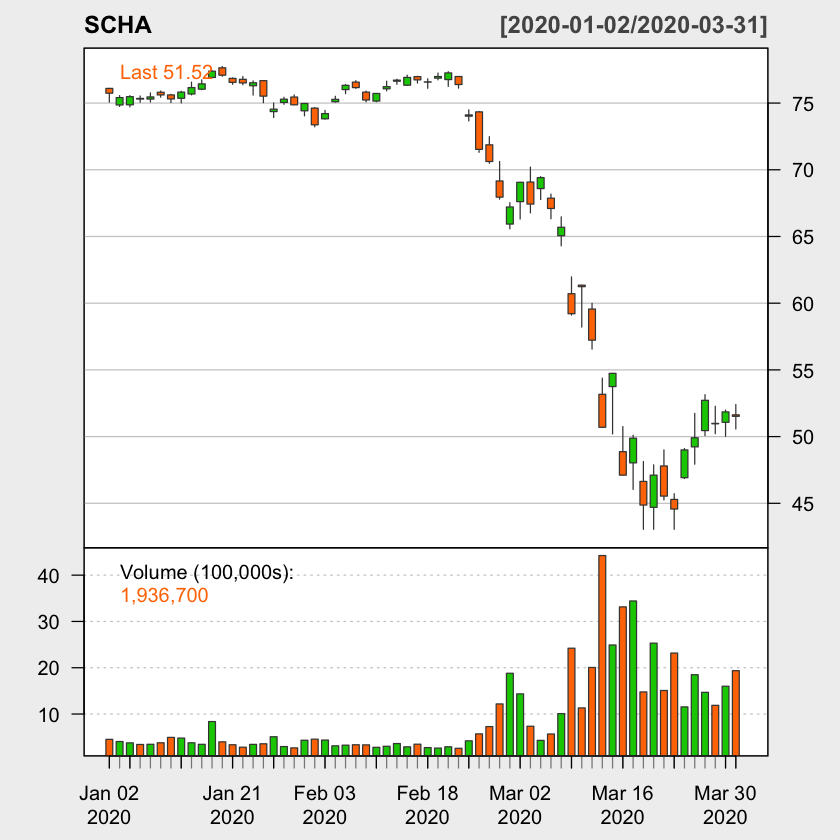

In [39]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

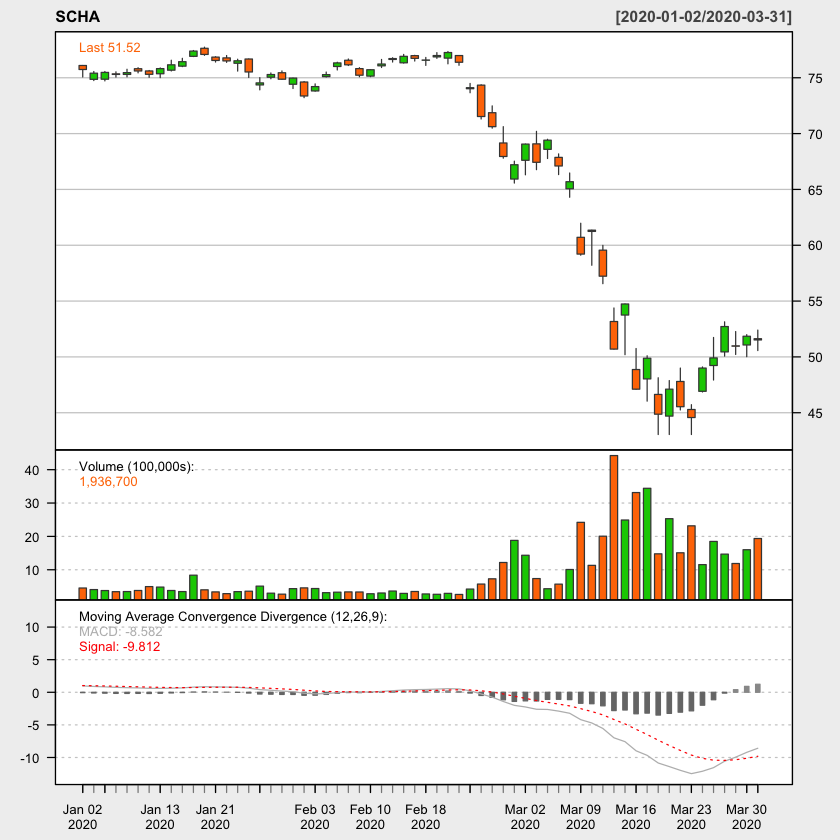

In [40]:
addMACD(fast=12, slow=26, signal=9, type="EMA")

#### 7.4.7 Charting RSI

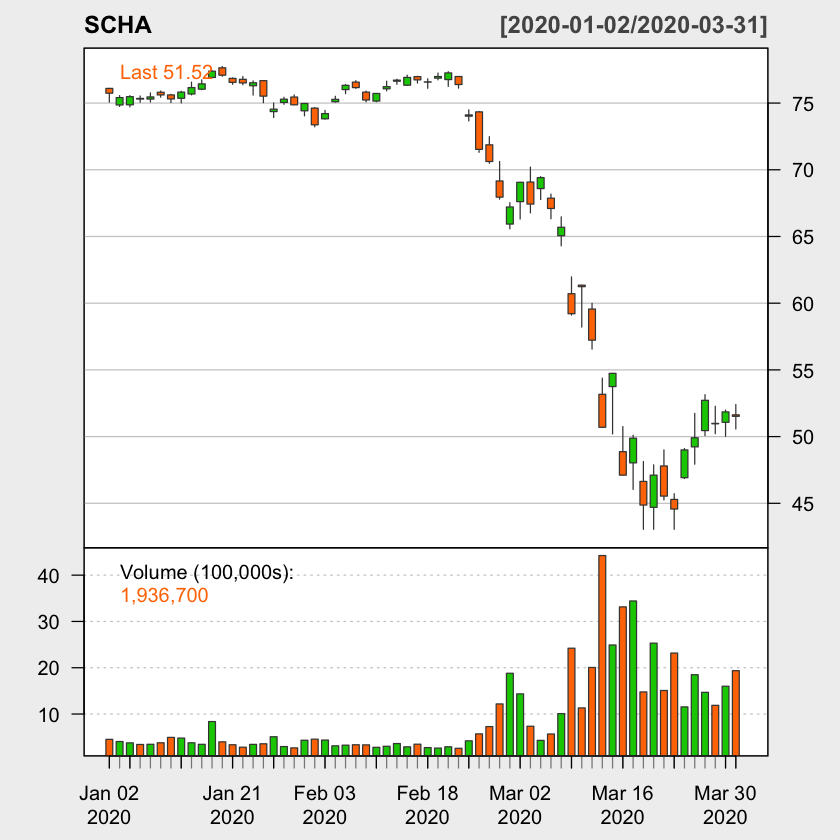

In [41]:
chartSeries(SCHA,
           subset='2020-01::2020-03',
            theme=chartTheme('white'))

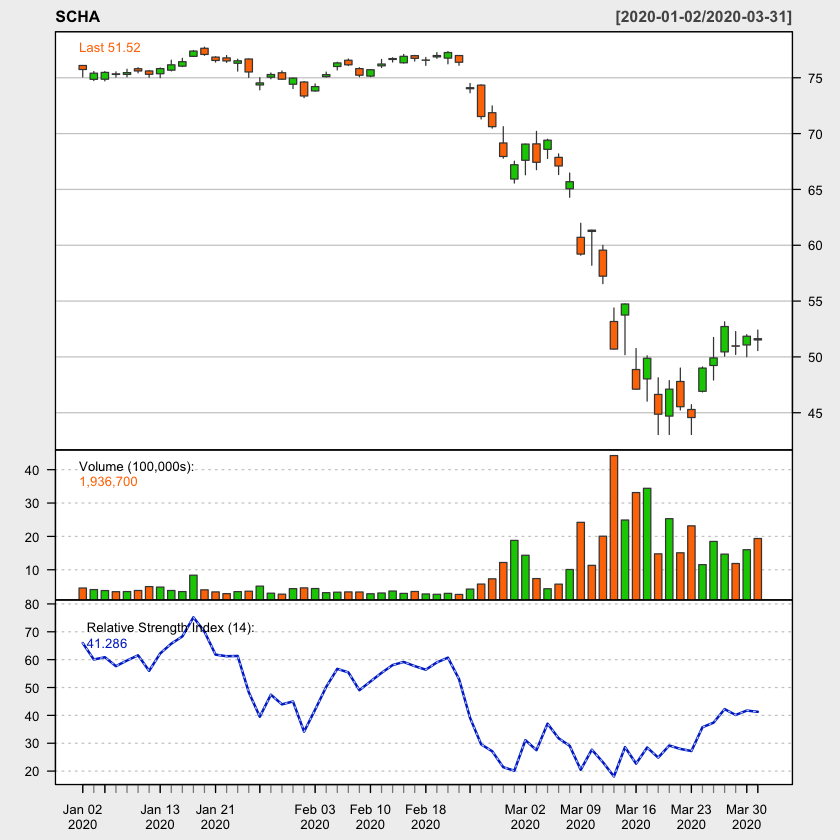

In [42]:
addRSI(n=14, maType="EMA")

#### Charting Custom TA

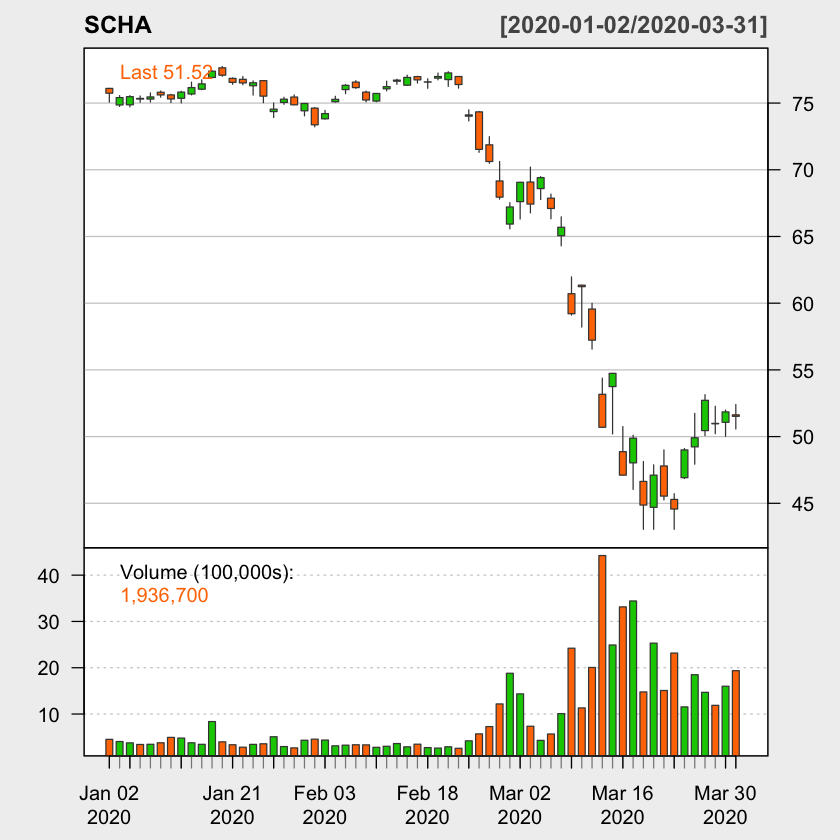

In [43]:
sma <- SMA(Cl(SCHA), n=14)
chartSeries(SCHA,
           subset='2020-01::2020-03',
           theme=chartTheme('white'))

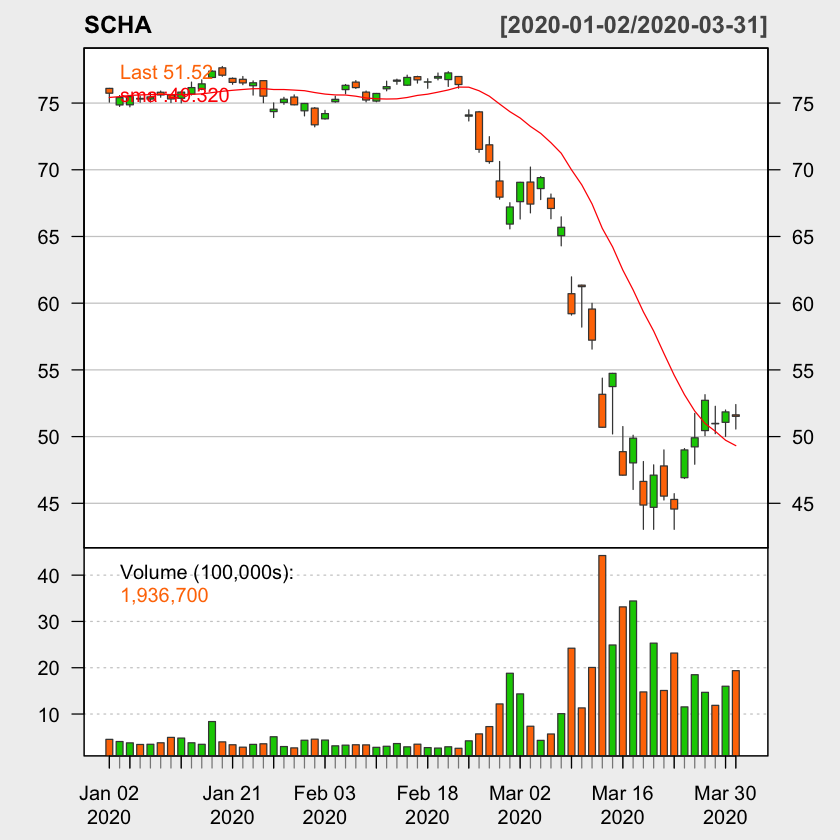

In [44]:
addTA(sma, on=1, col="red")